In [3]:
import numpy as np
import pandas as pd

orderitems = pd.read_csv("order_items_dataset.csv", engine='python')
#orderitems['Seller ID'] = pd.(orders['order_purchase_timestamp']).dt.date
sellersidetc = pd.read_csv("sellers_dataset.csv", engine='python')
selleralldata= pd.merge(orderitems, sellersidetc)
display(selleralldata)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP


In [4]:
neededsellerdata = selleralldata[['seller_id', 'seller_city', 'seller_state']]
realsellerdata= neededsellerdata.drop_duplicates('seller_id')
display(realsellerdata)

,seller_id,seller_city,seller_state
0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP
151,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP
294,5b51032eddd242adc84c38acab88f23d,borda da mata,MG
308,9d7a1d34a5052409006425275ba1c2b4,franca,SP
324,df560393f3a51e74553ab94004ba5c87,loanda,PR
...,...,...,...
112644,d1aa1ec0839dcab73a6161130eb1f94a,curitiba,PR
112645,dbc51f5e45d654ecc16cb68e6817ecea,franca,SP
112646,3fefda3299e6dfaea3466ef346a3571a,curitiba,PR
112647,80ceebb4ee9b31afb6c6a916a574a1e2,londrina,PR


In [5]:
stateofseller = realsellerdata['seller_state'].value_counts()
display(stateofseller.head(10))

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_state, dtype: int64

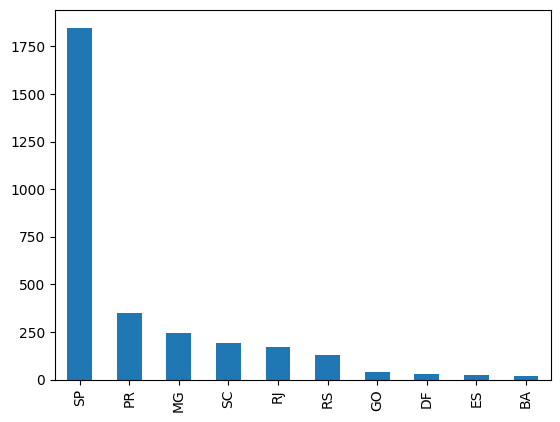

In [6]:
plotmostfivest = stateofseller.head(10).plot.bar()

In [8]:
cityofseller = realsellerdata['seller_city'].value_counts()
cityofseller.head(10)

sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_city, dtype: int64

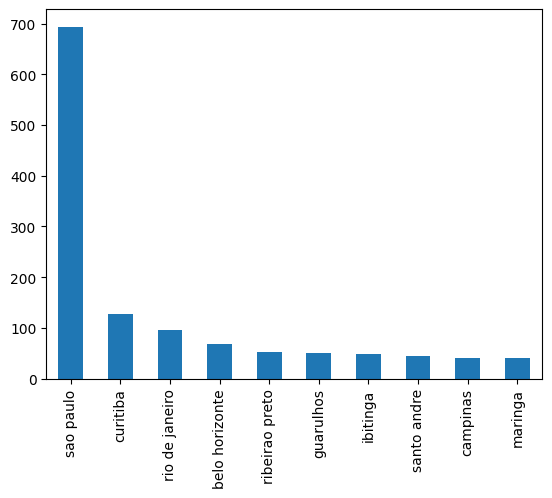

In [9]:
plotmostfivest = cityofseller.head(10).plot.bar()

In [10]:
orderitemsvalue= orderitems['seller_id'].value_counts()
bestsellers= orderitemsvalue.head(5)
print("En çok satış yapan satıcılar:\n")
display(bestsellers)

En çok satış yapan satıcılar:



6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [32]:
a=realsellerdata[(realsellerdata.values.ravel() == '6560211a19b47992c3666cc44a7e94c0').reshape(realsellerdata.shape).any(1)]
b=realsellerdata[(realsellerdata.values.ravel() == '4a3ca9315b744ce9f8e9374361493884').reshape(realsellerdata.shape).any(1)]
c=realsellerdata[(realsellerdata.values.ravel() == '1f50f920176fa81dab994f9023523100').reshape(realsellerdata.shape).any(1)]
d=realsellerdata[(realsellerdata.values.ravel() == 'cc419e0650a3c5ba77189a1882b7556a').reshape(realsellerdata.shape).any(1)]
e=realsellerdata[(realsellerdata.values.ravel() == 'da8622b14eb17ae2831f4ac5b9dab84a').reshape(realsellerdata.shape).any(1)]

In [36]:
wheretheyare = [a, b, c, d, e]
print(wheretheyare)

[                              seller_id seller_city seller_state
10363  6560211a19b47992c3666cc44a7e94c0   sao paulo           SP,                              seller_id seller_city seller_state
2666  4a3ca9315b744ce9f8e9374361493884    ibitinga           SP,                              seller_id            seller_city seller_state
4653  1f50f920176fa81dab994f9023523100  sao jose do rio preto           SP,                             seller_id  seller_city seller_state
872  cc419e0650a3c5ba77189a1882b7556a  santo andre           SP,                               seller_id seller_city seller_state
59020  da8622b14eb17ae2831f4ac5b9dab84a  piracicaba           SP]
